In [368]:
import k3d
import pandas as pd
import numpy as np
import toyplot
import toyplot.svg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from phyloshape.simulate.draw import draw_beak

In [375]:
import math
math.comb(80, 2)

3160

In [369]:
params = pd.read_csv("../simbeak/datasets/TEST_params.csv", index_col=0)
params.head()

,length,rotation,curve_x,curve_y
0,1.0,-4.712389,-0.75,-0.75
1,1.0,-4.712389,-0.75,0.00
2,1.0,-4.712389,-0.75,0.75
3,1.0,-4.712389,0.00,-0.75
4,1.0,-4.712389,0.00,0.00


In [338]:
points = pd.read_csv("../simbeak/datasets/TEST_landmarks.csv", index_col=0)
points["dset"] = points["dset"].astype(int)
points.head()

,dset,x,y,z
0,0,0.000000,0.272628,-0.962120
1,0,-0.308699,0.272760,-0.911212
2,0,-0.587181,0.246193,-0.771108
3,0,-0.808186,0.195527,-0.555523
4,0,-0.950079,0.125721,-0.285559


In [367]:
points.dset = points.dset.astype(str)
points

,dset,x,y,z
0,0,0.000000,0.272628,-0.962120
1,0,-0.308699,0.272760,-0.911212
2,0,-0.587181,0.246193,-0.771108
3,0,-0.808186,0.195527,-0.555523
4,0,-0.950079,0.125721,-0.285559
...,...,...,...,...
134995,134,-0.731282,-0.745602,6.815005
134996,134,-0.735653,-0.714761,6.817942
134997,134,-0.748337,-0.687044,6.824996
134998,134,-0.768093,-0.665164,6.835475


In [ ]:
{396, 397, 398, 399, 400, 401, 402, 403, 404}

In [344]:
def get_xyz(points, idx: int):
    return points.loc[points['dset'] == idx, ("x", "y", "z")].values

In [333]:
import time
import ipywidgets

In [350]:
dset = get_xyz(points, 50)

In [351]:
plot = draw_beak(dset.reshape((50, -1, 3)), grid_visible=False)
plot

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [334]:
dset = get_xyz(points, 200)
plot = draw_beak(dset.reshape((50, -1, 3)), grid_visible=False)
plot += k3d.points([0, 0, 0], point_size=0.01, color=0x000000)
plot += k3d.points([-3, 0, 0], point_size=0.01, color=0x000000)
plot += k3d.points([0, -3, 0], point_size=0.01, color=0x000000)
plot += k3d.points([3, 0, 0], point_size=0.01, color=0x000000)
plot += k3d.points([0, 3, 0], point_size=0.01, color=0x000000)

plot += k3d.points([0, 0, 3], point_size=0.01, color=0x000000)
plot += k3d.points([-3, 0, 3], point_size=0.01, color=0x000000)
plot += k3d.points([0, -3, 3], point_size=0.01, color=0x000000)
plot += k3d.points([3, 0, 3], point_size=0.01, color=0x000000)
plot += k3d.points([0, 3, 3], point_size=0.01, color=0x000000)

plot.screenshot_scale = 2
plot.display()

Output()

In [246]:
plot.fetch_screenshot()
plot.screenshot_scale = 10.0
with open('/tmp/test-0.png', 'wb') as fp:
    from base64 import b64decode
    out = b64decode(plot.screenshot)
    print(plot.screenshot)
    fp.write(out)

iVBORw0KGgoAAAANSUhEUgAACLQAAAQACAYAAADyGpIHAAAgAElEQVR4Xuzde3TfdZ3n8VfSNGmbNm16S5MWpJ4CAuVSoIAo9YZUKsjFy7qKjLs4Tjkuo+iRPaO7Z1k9cnR23XX3KM4ZWZc5eNwZKeCMCBUd0UHkVlALiqVcekl+bdMmvSRNmzZp9ldnj3vm6FwKbfrJr49wOBRIfr/39/F+//k8v9SNVL/iiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAhAnWClkI2YQwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHfCAhaHAIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBRAoKWotZhGAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAUGLGyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEChKQNBS1DoMQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgIGhxAwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAkUJCFqKWodhCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEBC1ugAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCgBQUtR6zAMAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAoMUNECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFCUgaClqHYYhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAQtLgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBogQELUWtwzAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE

## PCA

In [157]:
X.shape

(405, 4000)

In [326]:
pca = PCA(whiten=True)
x = points.groupby("dset").apply(np.array).apply(np.ndarray.flatten)
X = np.array([i for i in x])
pcs = pca.fit_transform(X)
c, a, m = toyplot.scatterplot(pcs[:, 0], pcs[:, 1], size=6, opacity=0.5, width=400, height=400);
a.x.label.text = "PC0 (99.99%)"
a.y.label.text = "PC1 (0.01%)"

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="400.0px" viewBox="0 0 400.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t70c7912dcb74445dba50b8c4acf908b4"> -2 -1 0 1 2 PC0 (99.99%) -2 -1 0 1 2 PC1 (0.01%)

In [327]:
p0 = pcs[:, 0]
p1 = pcs[:, 1]

In [324]:
s0 = set(np.where(p0 < 100)[0])
s1 = set(np.where(p0 > -100)[0])
s2 = set(np.where(p1 < 10)[0])
s3 = set(np.where(p1 > -10)[0])
s0 & s1 & s2 & s3

{199, 200, 201, 202, 203, 204, 205}

In [318]:
s0 = set(np.where(p0 < -4000)[0])
s1 = set(np.where(p1 < 30)[0])
s2 = set(np.where(p1 > 10)[0])
s0 & s1 & s2

{369, 370, 371, 372, 373, 374, 375, 376, 377}

In [315]:
s0 = set(np.where(p0 < -4000)[0])
s1 = set(np.where(p1 < 10)[0])
s2 = set(np.where(p1 > -10)[0])
s0 & s1 & s2

{329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395}

In [313]:
s0 = set(np.where(p0 < -4000)[0])
s1 = set(np.where(p1 < -30)[0])
s0 & s1 

{378, 379, 380, 381, 382, 383, 384, 385, 386}

In [308]:
s0 = set(np.where(p0 < 0)[0])
s1 = set(np.where(p0 > -3000)[0])
s2 = set(np.where(p1 < -35)[0])
s0 & s1 & s2

{270, 271, 272, 273, 274, 275, 276, 277, 278}

In [307]:
s0 = set(np.where(p0 < 4000)[0])
s1 = set(np.where(p0 > 0)[0])
s2 = set(np.where(p1 < -30)[0])
s0 & s1 & s2

{135, 136, 137, 138, 139, 140, 141, 142, 143}

In [294]:
s0 = set(np.where(p0 > 4000)[0])
s1 = set(np.where(p1 < -25)[0])
s0 & s1 

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [273]:
s0 = set(np.where(p0 < -4000)[0])
s1 = set(np.where(p1 > 25)[0])
s0 & s1

{396, 397, 398, 399, 400, 401, 402, 403, 404}

In [277]:
s0 = set(np.where(p0 > 4000)[0])
s1 = set(np.where(p1 > 25)[0])
s0 & s1 

{18, 19, 20, 21, 22, 23, 24, 25, 26}

In [278]:
s0 = set(np.where(p0 > -4000)[0])
s1 = set(np.where(p1 > 25)[0])
s2 = set(np.where(p0 < 0)[0])
s0 & s1 & s2

{261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296}

In [279]:
s0 = set(np.where(p0 < 4000)[0])
s1 = set(np.where(p1 > 25)[0])
s2 = set(np.where(p0 > 0)[0])
s0 & s1 & s2

{104,
 107,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161}

In [293]:
s0 = set(np.where(p0 > 4000)[0])
s1 = set(np.where(p1 < 10)[0])
s2 = set(np.where(p1 > -10)[0])
s0 & s1 & s2

{9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75}

-0.03162077861086608 7.441760822694716e-05
-4.8332592253045974e-18 -9.39815985038832e-17
-3.111556421860724e-05 -0.0006089811213927615
8.880625197805436e-20 5.1906466763199117e-17
-0.0316207786108659 7.441760823470996e-05


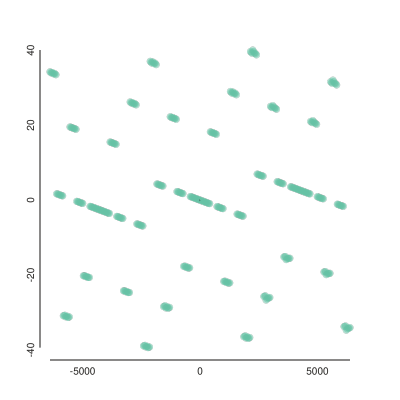

In [155]:
coeff = pca.components_[0:2]
coeff = np.transpose(coeff)

for i in range(5):
    loadx = coeff[i, 0]
    loady = coeff[i, 1]
    a.plot([0, loadx], [0, loady], color="black")
    print(loadx, loady)
c

In [135]:
pca.explained_variance_ratio_[:10]

array([9.99938612e-01, 2.93754011e-05, 1.49854913e-05, 8.32722975e-06,
       4.88187017e-06, 1.71927471e-06, 1.16419766e-06, 3.25758350e-07,
       1.52356719e-07, 1.39655924e-07])

In [ ]:
    
    if loadings:
        coeff = np.transpose(loadings.components_[0:2, :])
        n = coeff.shape[0]

        for i in range(n):
            loading_x = coeff[i,0]
            loading_y = coeff[i,1]
            loading_name = original_df.loc[:, features].columns[i]
            axes.plot([0, loading_x],[0, loading_y], color="black")
            axes.text(loading_x*1.5,loading_y*1.5, loading_name, color="black", style={"font-size":"16px"})

       
    

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[["logarea","logteeth",'logar']])
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'],
                           index=df["new_name"].values)